In [40]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



In [41]:
#READ DATA
train=pd.read_csv('D:\python\Project\House Price\house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('D:\python\Project\House Price\house-prices-advanced-regression-techniques/test.csv')

In [43]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
train.shape

(1460, 81)

In [47]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [48]:
#PoolQC:Pool Quality( Excellent, Good, Average, Fair)
#MiscFeature: Miscellaneous feature not covered in other categories: Elavator, Second Garage, ...
#Fence: Fence quality:GdPrv	Good Privacy, MnPrv	Minimum Privacy, GdWo	Good Wood, MnWw	Minimum Wood/Wire, NA	No Fence
#Alley: Type of alley access to property:Grvl	Gravel, Pave	Paved, NA 	No alley access
#The high percentage of these four features are null, So it is better to remove them 
train.drop(['PoolQC','MiscFeature','Fence','Alley'], axis=1,inplace=True)

In [49]:
pd.set_option('display.max_rows',None)
pd.DataFrame(train.isnull().sum().sort_values(ascending=False))

,0
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37


In [50]:
#These are numerical values
#LotFrontage: Linear feet of street connected to property
#MasVnrArea: Masonry veneer area in square feet
#GarageYrBlt: Year garage was built


In [51]:
#SOLUTION NUMBER 1
# train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
# train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
# train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

In [52]:
#SOLUTION NUMBER 2
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train[['GarageYrBlt','LotFrontage','MasVnrArea']])
train[['GarageYrBlt','LotFrontage','MasVnrArea']]=imputer.transform(train[['GarageYrBlt','LotFrontage','MasVnrArea']])

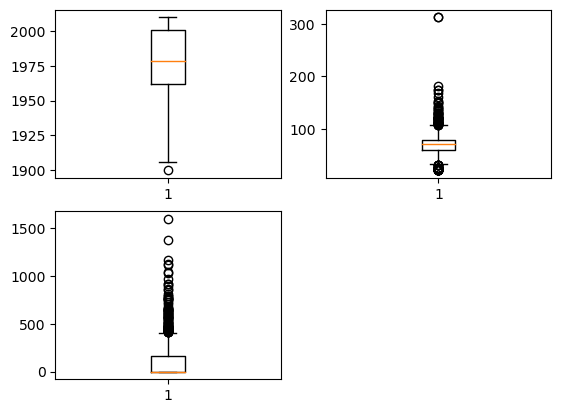

In [107]:
#Finding Outlier
#'GarageYrBlt','LotFrontage','MasVnrArea'
# sns.boxplot(train['MasVnrArea'])

data = train[['GarageYrBlt','LotFrontage','MasVnrArea']]
fig = plt.figure()
for i in range(data.shape[1]):
    sub = fig.add_subplot(2, 2, i+1)
    sub.boxplot(data.iloc[:,i])
    for col in data.columns:
    print(col)
plt.show()


In [ ]:
df.drop(df[df['Fare'] == 512.3292].index, inplace = True)

In [53]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False))

,0
FireplaceQu,690
GarageCond,81
GarageType,81
GarageFinish,81
GarageQual,81
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37
BsmtCond,37
BsmtQual,37


In [54]:
#These are Categorical values
#Fireplace quality:excellent, ...
#BsmtExposure: Refers to walkout or garden level walls: good, average,...
#BsmtFinType1: Rating of basement finished area

In [55]:
#SOLUTION NUMBER 1
# train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
# train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
# train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
# train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
# train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
# train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
# train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
# train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
# train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
# train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
# train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
# train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
# train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
# train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])

In [56]:
imputer1=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer1.fit(train[['FireplaceQu','GarageCond','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'Electrical','GarageCond','GarageType','GarageFinish','GarageQual','GarageType']])
train[['FireplaceQu','GarageCond','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'Electrical','GarageCond','GarageType','GarageFinish','GarageQual','GarageType']]=imputer1.transform(train[['FireplaceQu','GarageCond','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'Electrical','GarageCond','GarageType','GarageFinish','GarageQual','GarageType']])

In [57]:
train.isnull().sum().sort_values(ascending=False)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
TotalBsmtSF      0
Utilities        0
LandContour      0
LotShape    

In [58]:
#SOLUTION NUMBER 1
train = pd.get_dummies(train,drop_first = True)
test = pd.get_dummies(test,drop_first = True)
cols = train.columns.tolist()
test = test.reindex(columns=cols).fillna(0)

In [59]:
#SOLUTION NUMBER 2
# ct=ColumnTransformer(transformer[{'encoder',OneHotEncoder(),[Categorical columns])}, remainder='passthrough')
# train=np.array(ct.fit_transformer(train))

In [60]:
corr=train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-9.600822e-03,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-3.570559e-01,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000e+00,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.012674,-0.051787,0.126580,-0.023461,-0.089928,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,3.067946e-01,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,2.341962e-01,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,0.012609,-0.059316,-5.282010e-02,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,0.001299,-0.019779,-0.156175,-0.050663,0.163684,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,-0.012713,0.027850,1.175980e-01,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.002975,-0.023431,0.346954,0.012122,-0.238463,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,-0.021998,0.040581,8.274589e-02,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.011175,-0.039952,0.325647,-0.011431,-0.182733,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
MasVnrArea,-0.050199,0.022895,1.792835e-01,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.015431,-0.022891,0.169156,-0.026065,-0.130559,-0.011959,-0.009689,-0.009914,-0.084241,0.165606
BsmtFinSF1,-0.005024,-0.069836,2.158284e-01,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.022726,-0.017825,0.044883,0.010652,-0.024778,-0.014874,0.021369,0.000765,-0.019560,0.044912


In [61]:
high_corr=corr.index[abs(corr['SalePrice']) > 0.40]
print(high_corr)
print(len(high_corr))

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       'Neighborhood_NridgHt', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'KitchenQual_TA',
       'GarageFinish_Unf'],
      dtype='object')
22


In [62]:
x=train[high_corr.drop('SalePrice')]
y=train.SalePrice
test=test[high_corr.drop('SalePrice')]

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [64]:
sc=StandardScaler()
x_train_norm=sc.fit_transform(x_train)
x_test_norm=sc.transform(x_test)
test_norm=sc.transform(test)

In [65]:
model=LinearRegression()
model.fit(x_train_norm,y_train)

LinearRegression()

In [66]:
pred_train=model.predict(x_train_norm)
pred_test=model.predict(x_test_norm)

In [67]:
df=pd.DataFrame(y_train)
df

,SalePrice
618,314813
870,109500
92,163500
817,271000
302,205000
1454,185000
40,160000
959,155000
75,91000
1389,131000


In [73]:
df['pred_train']=round(df['pred_train'],2)

In [30]:
mse=mean_squared_error(y_train,pred_train)
#print(f"MSE for cross validation set : {mean_squared_error(y_test,pred_test)}")
mse

1028547249.6143088